In [ ]:
import pandas as pd
import requests
from io import StringIO


In [2]:
res = requests.get('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day36-imputing-numerical-data/titanic_toy.csv').text
df= pd.read_csv(StringIO(res))

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()

fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()

In [6]:
df['Age_mean']=df['Age'].fillna(age_mean)
df['Age_median']=df['Age'].fillna(age_median)

df['Fare_mean']=df['Fare'].fillna(fare_mean)
df['Fare_median']=df['Fare'].fillna(fare_median)

In [7]:
df.sample(5)

,Age,Fare,Family,Survived,Age_mean,Age_median,Fare_mean,Fare_median
742,21.0,262.375,4,1,21.000000,21.0,262.375,262.375
846,NaN,69.550,10,0,29.699118,28.0,69.550,69.550
142,24.0,15.850,1,1,24.000000,24.0,15.850,15.850
11,58.0,26.550,0,1,58.000000,58.0,26.550,26.550
577,39.0,55.900,1,1,39.000000,39.0,55.900,55.900


In [8]:
print('Original Age variable variance: ', df['Age'].var())
print('Age Variance after median imputation: ', df['Age_median'].var())
print('Age Variance after mean imputation: ', df['Age_mean'].var())

print('Original Fare variable variance: ', df['Fare'].var())
print('Fare Variance after median imputation: ', df['Fare_median'].var())
print('Fare Variance after mean imputation: ', df['Fare_mean'].var())

Original Age variable variance:  211.01912474630802
Age Variance after median imputation:  169.51249827942345
Age Variance after mean imputation:  169.0523999372108
Original Fare variable variance:  2530.6730768999514
Fare Variance after median imputation:  2417.971599672527
Fare Variance after mean imputation:  2402.717696607258


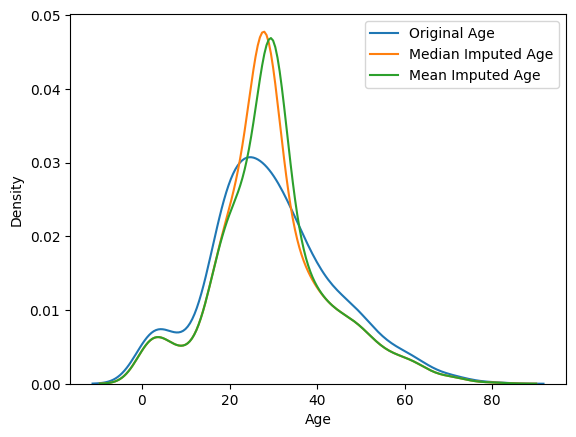

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111)

sns.kdeplot(df['Age'], ax=ax, label='Original Age')
sns.kdeplot(df['Age_median'], ax=ax, label='Median Imputed Age')
sns.kdeplot(df['Age_mean'], ax=ax, label='Mean Imputed Age')

ax.legend(loc='best')
plt.show()

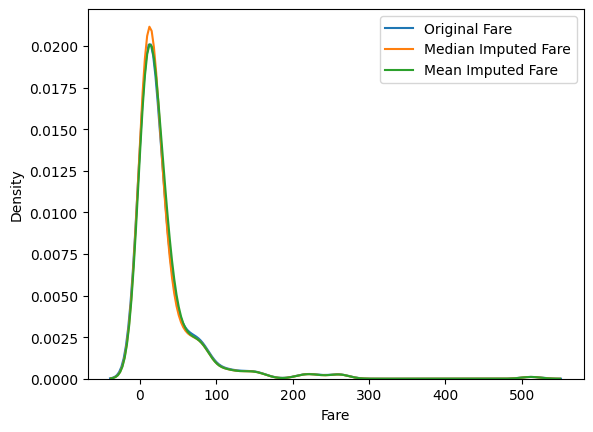

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.kdeplot(df['Fare'], ax=ax, label='Original Fare')
sns.kdeplot(df['Fare_median'], ax=ax, label='Median Imputed Fare')
sns.kdeplot(df['Fare_mean'], ax=ax, label='Mean Imputed Fare')

ax.legend(loc='best')
plt.show()

In [18]:
df.cov()

,Age,Fare,Family,Survived,Age_mean,Age_median,Fare_mean,Fare_median
Age,211.019125,78.071438,-6.507525,-0.551296,211.019125,211.019125,73.727862,73.196997
Fare,78.071438,2530.673077,17.460363,6.442361,62.210610,65.546143,2530.673077,2530.673077
Family,-6.507525,17.460363,2.603248,0.013063,-5.213332,-5.159658,16.577535,16.611725
Survived,-0.551296,6.442361,0.013063,0.236772,-0.441656,-0.411226,6.116624,6.021945
Age_mean,211.019125,62.210610,-5.213332,-0.441656,169.052400,169.052400,59.065130,58.639842
Age_median,211.019125,65.546143,-5.159658,-0.411226,169.052400,169.512498,62.232012,61.706696
Fare_mean,73.727862,2530.673077,16.577535,6.116624,59.065130,62.232012,2402.717697,2402.717697
Fare_median,73.196997,2530.673077,16.611725,6.021945,58.639842,61.706696,2402.717697,2417.971600


In [19]:
df.corr()

,Age,Fare,Family,Survived,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.099481,-0.301914,-0.077221,1.000000,1.000000,0.097273,0.096203
Fare,0.099481,1.000000,0.212626,0.263920,0.094681,0.099626,1.000000,1.000000
Family,-0.301914,0.212626,1.000000,0.016639,-0.248512,-0.245619,0.209609,0.209378
Survived,-0.077221,0.263920,0.016639,1.000000,-0.069809,-0.064910,0.256445,0.251678
Age_mean,1.000000,0.094681,-0.248512,-0.069809,1.000000,0.998642,0.092676,0.091718
Age_median,1.000000,0.099626,-0.245619,-0.064910,0.998642,1.000000,0.097513,0.096384
Fare_mean,0.097273,1.000000,0.209609,0.256445,0.092676,0.097513,1.000000,0.996841
Fare_median,0.096203,1.000000,0.209378,0.251678,0.091718,0.096384,0.996841,1.000000


<Axes: >

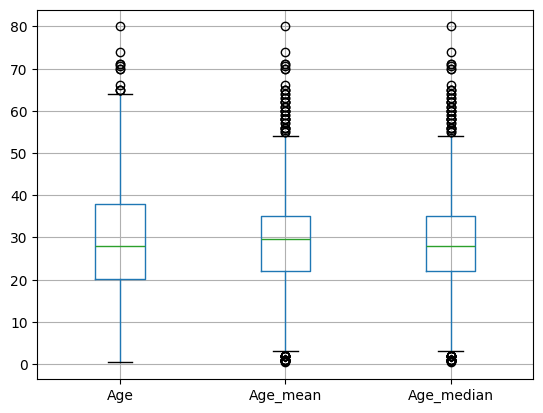

In [20]:
df[['Age', 'Age_mean', 'Age_median']].boxplot()

<Axes: >

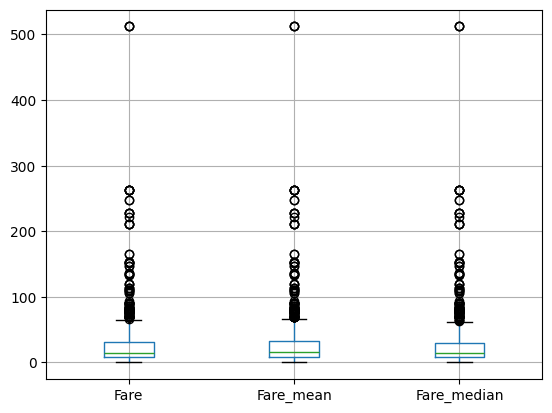

In [22]:
df[['Fare', 'Fare_mean', 'Fare_median']].boxplot()

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
impAge = SimpleImputer(strategy='mean')
impFare = SimpleImputer(strategy='median')

In [24]:
trf = ColumnTransformer(transformers=[
    ('impage', impAge, ['Age']),
    ('impfare', impFare, ['Fare'])
])

In [25]:
trf.fit(df)

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('impage', ...), ('impfare', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``.

In [ ]:
trf.named_transformers_['impage'].statistics_

array([29.69911765])

In [30]:
trf.named_transformers_['impfare'].statistics_ ## value used to fill missing data


array([14.4542])

In [32]:
new_x = pd.DataFrame(trf.transform(df), columns=['Age', 'Fare'])

In [36]:
new_x.isnull().sum()

Age     0
Fare    0
dtype: int64